In [1]:
import geopandas as gp
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib

In [2]:
crop_regions = gp.read_file('crops_SA_WA/crops_SA_WA.shp')
crop_regions = crop_regions.drop([1])

In [3]:
towns = gp.read_file('Climate_Margin_Town/Climate_Margin_Town.shp')
sa_towns = towns[towns['POINT_X'] > 125]
wa_towns = towns[towns['POINT_X'] < 125]

In [4]:
aus = gp.read_file('/Users/irv033/Desktop/shapefiles/data/australia_states_territories/australia_states_territories.shp')
aus = aus.drop([8])

In [5]:
hadgem_file = 'pr_day_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r1i1p1f2_gn_19601101-19601230.nc'
hadgem_ds = xr.open_dataset(hadgem_file)
hadgem_lat_bnds = hadgem_ds['lat_bnds'].values[:, 0]
hadgem_lon_bnds = hadgem_ds['lon_bnds'].values[:, 0]

In [6]:
canesm_file = 'pr_day_CanESM5_dcppA-hindcast_s1960-r1i1p2f1_gn_19610101-19701231.nc'
canesm_ds = xr.open_dataset(canesm_file)
canesm_lat_bnds = canesm_ds['lat_bnds'].values[:, 0]
canesm_lon_bnds = canesm_ds['lon_bnds'].values[:, 0]

In [7]:
# https://mokole.com/palette.html
distinct_hex_colors = [
    '#c0c0c0',
    '#556b2f',
    '#8b4513',
    '#483d8b',
    '#3cb371',
    '#008080',
    '#9acd32',
    '#00008b',
    '#ff8c00',
    '#ffd700',
    '#7fff00',
    '#ba55d3',
    '#00ff7f',
    '#dc143c',
    '#00ffff',
    '#00bfff',
    '#0000ff',
    '#ff00ff',
    '#1e90ff',
    '#db7093',
    '#f0e68c',
    '#ff1493',
    '#ffa07a'
]
distinct_rgb_colors = map(matplotlib.colors.to_rgb, distinct_hex_colors)
distinct_rgb_colors = list(distinct_rgb_colors)
cmap = matplotlib.colors.ListedColormap(distinct_rgb_colors)

In [8]:
def plot_regions(model_name, lat_bnds, lon_bnds):
    """Plot regions for a given model lat and lon bounds"""

    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    ax1, ax2 = axes

    # WA
    crop_regions.plot(ax=ax1)
    wa_towns.plot(
        ax=ax1,
        column='NAME',
        legend=True,
        edgecolor='black',
        cmap=cmap,
        zorder=5,
        legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'ncol': 2},
    )
    aus.plot(
        ax=ax1,
        edgecolor='black',
        facecolor='none',
    )
    ax1.set_ylim([-36, -27])
    ax1.set_xlim([112, 125])
    ax1.set_ylabel('latitude')
    ax1.set_title('Western Australia')

    ymin, ymax = ax1.get_ylim()
    xmin, xmax = ax1.get_xlim()
    for lat in lat_bnds:
        if (lat > ymin) and (lat < ymax):
            ax1.axhline(lat, color='0.5', linewidth=0.7)
    for lon in lon_bnds:
        if (lon > xmin) and (lon < xmax):
            ax1.axvline(lon, color='0.5', linewidth=0.7)

    # SA
    crop_regions.plot(ax=ax2)
    sa_towns.plot(
        ax=ax2,
        column='NAME',
        legend=True,
        edgecolor='black',
        cmap=cmap,
        zorder=5,
        legend_kwds={'loc': 'center left', 'bbox_to_anchor': (1, 0.5), 'ncol': 2},
    )
    aus.plot(
        ax=ax2,
        edgecolor='black',
        facecolor='none',
    )
    ax2.set_ylim([-39, -31])
    ax2.set_xlim([131, 142])
    ax2.set_ylabel('latitude')
    ax2.set_xlabel('longitude')
    ax2.set_title('South Australia')

    ymin, ymax = ax2.get_ylim()
    xmin, xmax = ax2.get_xlim()
    for lat in lat_bnds:
        if (lat > ymin) and (lat < ymax):
            ax2.axhline(lat, color='0.5', linewidth=0.7)
    for lon in lon_bnds:
        if (lon > xmin) and (lon < xmax):
            ax2.axvline(lon, color='0.5', linewidth=0.7)

    plt.savefig(
        f'cropping_regions_{model_name}.png',
        bbox_inches='tight',
        facecolor='white',
        dpi=300
    )
    plt.show()

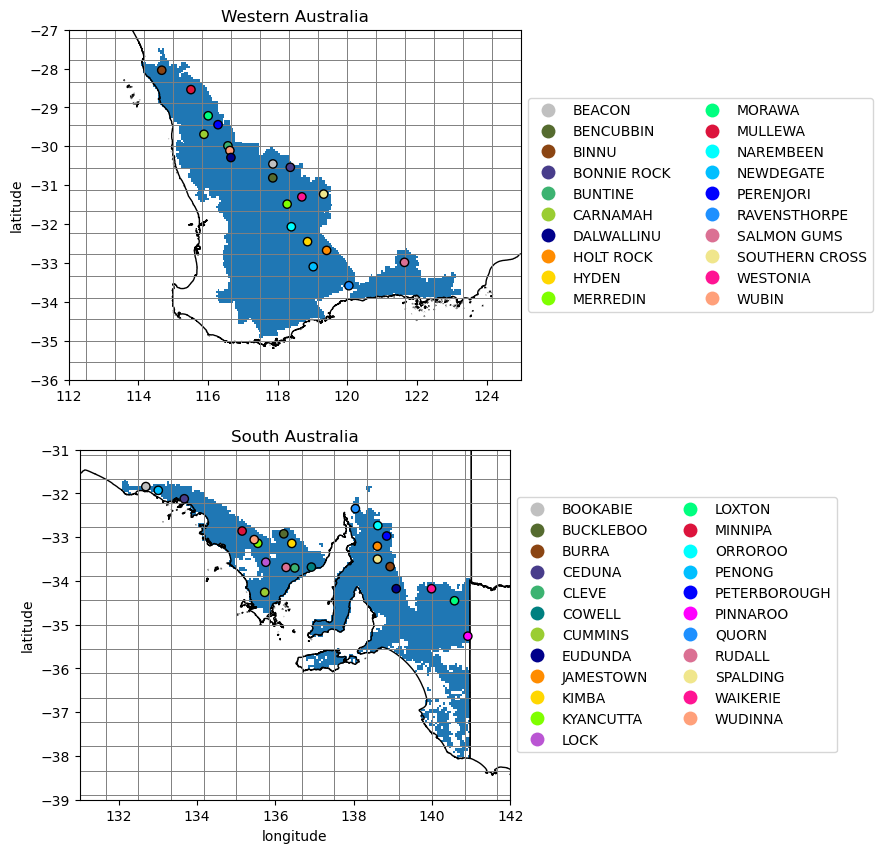

In [9]:
plot_regions('HadGEM3-GC31-MM', hadgem_lat_bnds, hadgem_lon_bnds)

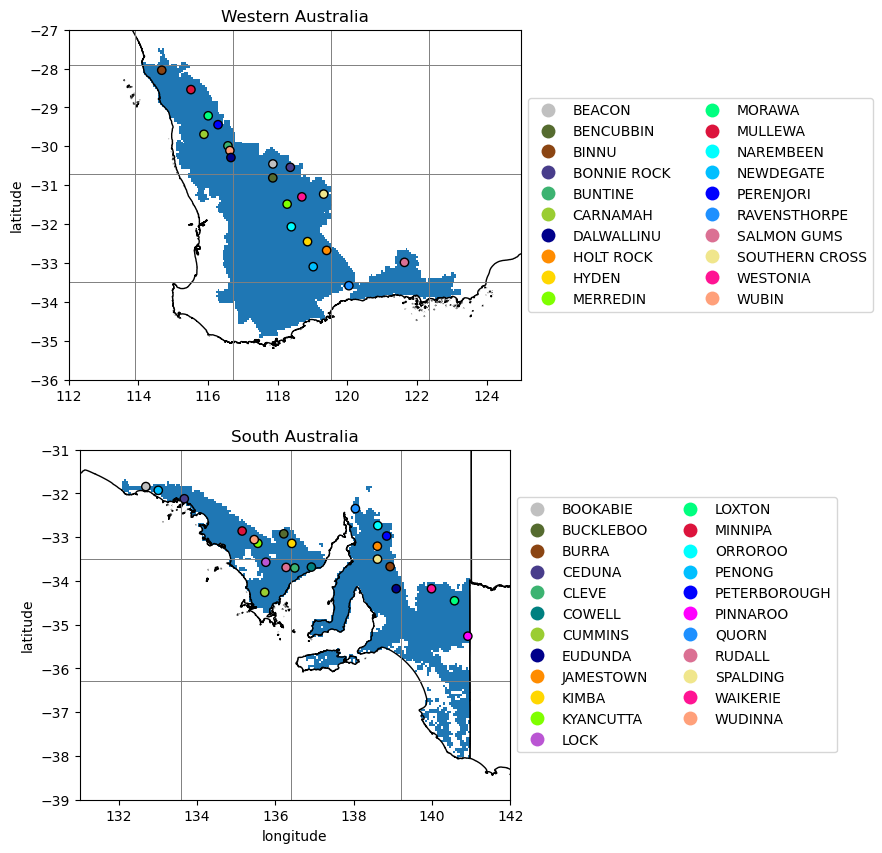

In [10]:
plot_regions('CanESM5', canesm_lat_bnds, canesm_lon_bnds)